In [5]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

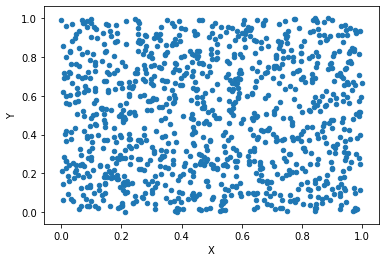

In [6]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

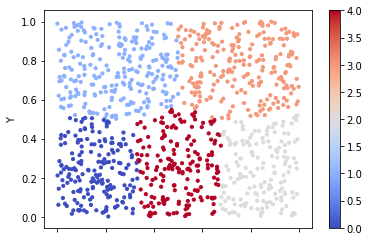

In [7]:
model1 = KMeans(n_clusters=5).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [8]:
crime = pd.read_csv("crime_data.csv")

In [9]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])


df_norm.head(10)  # Top 10 rows

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


([<matplotlib.axis.XTick at 0x26959427bc8>,
 <a list of 21 Text xticklabel objects>)

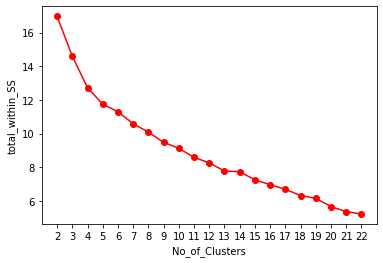

In [10]:
###### screw plot or elbow curve ############
k = list(range(2,23))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [12]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 

array([3, 0, 0, 1, 0, 0, 4, 1, 0, 3, 4, 2, 0, 1, 2, 1, 1, 3, 2, 0, 4, 0,
       4, 3, 1, 1, 4, 0, 2, 4, 0, 0, 3, 2, 1, 1, 1, 4, 4, 3, 2, 3, 0, 4,
       2, 1, 1, 2, 4, 1])

In [13]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [14]:
crime.iloc[:,1:7].groupby(crime.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.966667,264.000000,76.500000,33.608333,0
1,6.976923,149.538462,64.153846,20.646154,1
2,2.687500,72.000000,47.250000,10.425000,2
3,14.671429,251.285714,54.285714,21.685714,3
4,4.290000,109.100000,76.700000,15.470000,4


In [15]:
crime.to_csv("crime.csv")